In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.ticker import FuncFormatter

filmy = pd.read_csv('tmdb_movies.csv')
gatunki = pd.read_csv('tmdb_genres.csv')

In [12]:
vote = filmy['vote_count'].quantile(0.75)  
top_filmy = filmy[(filmy['vote_count'] > vote)].nlargest(10, 'vote_average')

# Wyświetlenie wyników
print(top_filmy[['title', 'vote_average', 'vote_count']])

                         title  vote_average  vote_count
1881  The Shawshank Redemption           8.5        8205
3337             The Godfather           8.4        5893
662                 Fight Club           8.3        9413
1818          Schindler's List           8.3        4329
2294             Spirited Away           8.3        3840
2731    The Godfather: Part II           8.3        3338
3232              Pulp Fiction           8.3        8428
3865                  Whiplash           8.3        4254
65             The Dark Knight           8.2       12002
690             The Green Mile           8.2        4048


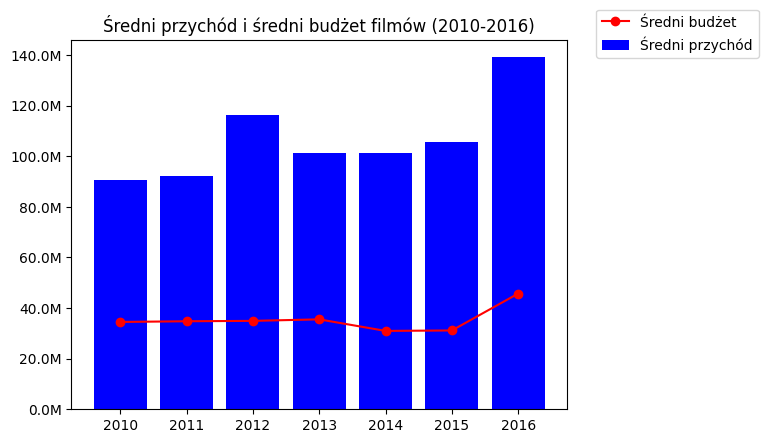

In [62]:
filmy['release_date'] = pd.to_datetime(filmy['release_date'])

filmy_okres = filmy[(filmy['release_date'].dt.year >= 2010) & (filmy['release_date'].dt.year <= 2016)]
grouped_data = filmy_okres.groupby(filmy_okres['release_date'].dt.year).agg({'revenue': 'mean', 'budget': 'mean'})

fig, ax = plt.subplots()

ax.bar(grouped_data.index, grouped_data['revenue'], color='blue', label='Średni przychód')
ax.plot(grouped_data.index, grouped_data['budget'], color='red', linestyle='-', marker='o', label='Średni budżet')

formatter = FuncFormatter(lambda x, _: '{:.1f}M'.format(x / 1000000))
ax.yaxis.set_major_formatter(formatter)

plt.title('Średni przychód i średni budżet filmów (2010-2016)')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.1))

plt.show()

In [65]:
gatunki = pd.read_csv('tmdb_genres.csv', header=None, names=['genre_id', 'genres'])

filmy_z_gatunkami = pd.merge(filmy, gatunki, left_on='genre_id', right_on='genre_id', how='left')

print(filmy_z_gatunkami.head())

   Unnamed: 0     budget                                      homepage  \
0           0  237000000                   http://www.avatarmovie.com/   
1           1  300000000  http://disney.go.com/disneypictures/pirates/   
2           2  245000000   http://www.sonypictures.com/movies/spectre/   
3           3  250000000            http://www.thedarkknightrises.com/   
4           4  260000000          http://movies.disney.com/john-carter   

       id original_language                            original_title  \
0   19995                en                                    Avatar   
1     285                en  Pirates of the Caribbean: At World's End   
2  206647                en                                   Spectre   
3   49026                en                     The Dark Knight Rises   
4   49529                en                               John Carter   

                                            overview  popularity release_date  \
0  In the 22nd century, a paraplegi

In [68]:
top_gatunek = filmy_z_gatunkami['genres'].value_counts().idxmax()
top_film = filmy_z_gatunkami[filmy_z_gatunkami['genres'] == top_gatunek].shape[0]

print("Najczęściej występujący gatunek filmu to:", top_gatunek)
print("Liczba filmów tego gatunku w bazie:", top_film)

Najczęściej występujący gatunek filmu to: Drama
Liczba filmów tego gatunku w bazie: 1207


In [99]:
czas_avg = filmy_z_gatunkami.groupby('genres')['runtime'].mean()

gatunek_avg = czas_avg.idxmax()
czas_gatunek = czas_avg.max()

print("Gatunek filmu", gatunek_avg, "trwa średnio najdłużej i wynosi",czas_gatunek)

Gatunek filmu History trwa średnio najdłużej i wynosi 133.96


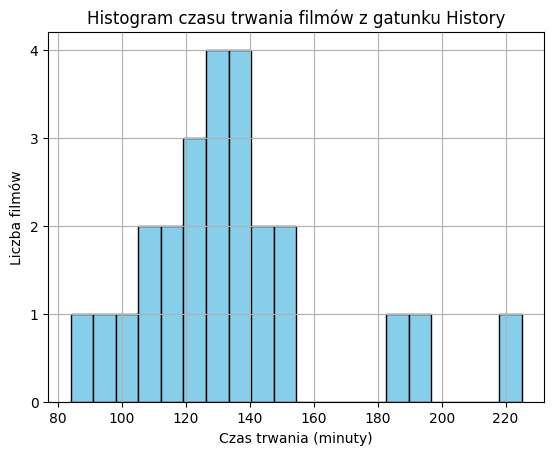

In [124]:
gatunek_max = filmy_z_gatunkami[filmy_z_gatunkami['genres'] == gatunek_avg]



plt.xlabel('Czas trwania (minuty)')
plt.ylabel('Liczba filmów')
plt.title('Histogram czasu trwania filmów z gatunku ' + gatunek_avg)
plt.grid(True)
plt.yticks(range(0, int(max(plt.hist(gatunek_max['runtime'], bins=20, color='skyblue', edgecolor='black')[0])) + 1, 1))
plt.xticks(range(80, int(gatunek_max['runtime'].max()) + 5, 20))

plt.show()